In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from perceptron import Perceptron

In [2]:
data = pd.read_csv("weatherHistory.csv")
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [3]:
data = data[["Formatted Date","Temperature (C)"]]
data["Formatted Date"] = pd.to_datetime(data["Formatted Date"],utc=True)
data.head()

,Formatted Date,Temperature (C)
0,2006-03-31 22:00:00+00:00,9.472222
1,2006-03-31 23:00:00+00:00,9.355556
2,2006-04-01 00:00:00+00:00,9.377778
3,2006-04-01 01:00:00+00:00,8.288889
4,2006-04-01 02:00:00+00:00,8.755556


In [4]:
data.rename(columns={"Formatted Date":"Date","Temperature (C)":"Temp"},inplace=True)

In [5]:
data["Year"] = data["Date"].dt.year
data["Day"] = data["Date"].dt.dayofyear
data.head()

,Date,Temp,Year,Day
0,2006-03-31 22:00:00+00:00,9.472222,2006,90
1,2006-03-31 23:00:00+00:00,9.355556,2006,90
2,2006-04-01 00:00:00+00:00,9.377778,2006,91
3,2006-04-01 01:00:00+00:00,8.288889,2006,91
4,2006-04-01 02:00:00+00:00,8.755556,2006,91


In [6]:
temp = data.groupby(["Year","Day"])["Temp"].mean().reset_index()
temp.head()

,Year,Day,Temp
0,2005,365,0.577778
1,2006,1,4.075000
2,2006,2,5.263194
3,2006,3,2.340509
4,2006,4,2.251852


In [7]:
X = data["Day"].values
Y = data["Temp"].values
X = X.reshape(-1,1)
Y = X.reshape(-1,1)

In [8]:
x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [9]:
perceptron = Perceptron(epoch=30,learning_rate=0.000001)
perceptron.fit(x_train,y_train)
y_pred = perceptron.predict(x_test)

In [10]:
perceptron.mean_absolute_error(y_test,y_pred)

0.32358274928557

In [11]:
perceptron.r2score(y_test,y_pred)

0.9999859588337099

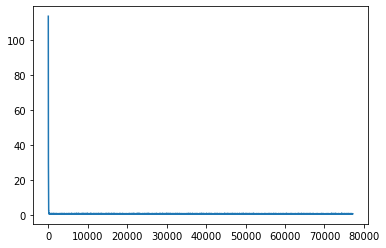

In [12]:
perceptron.plot_error_rate()

In [13]:
perceptron.save_model()